# Create Food.com SQL Database

In [1]:
import pandas as pd

# Load the CSV data
csv_data = pd.read_csv('data/RAW_recipes.csv')

# Select the columns of interest
columns_of_interest = ['id', 'ingredients']
csv_data = csv_data[columns_of_interest]

# Initialize a dictionary to store ingredient counts
ingredient_counts = {}

# Loop through each recipe
for index, row in csv_data.iterrows():
    ingredients = eval(row['ingredients']) 

    for ingredient in ingredients:
        ingredient_counts[ingredient] = ingredient_counts.get(ingredient, 0) + 1

# Create a DataFrame from the ingredient counts
ingredient_counts_df = pd.DataFrame(ingredient_counts.items(), columns=['Ingredient', 'Count'])

In [2]:
ingredient_counts_df

,Ingredient,Count
0,winter squash,60
1,mexican seasoning,27
2,mixed spice,227
3,honey,9898
4,butter,54975
...,...,...
14937,apricot jell-o,1
14938,rosarita premium whole black beans,1
14939,hunt's fire roasted diced tomatoes,1
14940,skinless halibut fillet,1


In [3]:
print(ingredient_counts_df['Count'].describe())

count    14942.000000
mean       140.314683
std       1341.349585
min          1.000000
25%          2.000000
50%          5.000000
75%         28.000000
max      85746.000000
Name: Count, dtype: float64


In [4]:
import pandas as pd
import pickle

# Load the ingredient mapping data from the pickled file (ingr_map.pkl)
with open('data/ingr_map.pkl', 'rb') as f:
    ingr_map = pickle.load(f)

# Create a DataFrame from the ingr_map
ingr_map_df = pd.DataFrame(ingr_map)

In [5]:
ingr_map_df

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
3,iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308
4,red romaine lettuce,3,red romaine lettuce,19,lettuce,4507,4308
...,...,...,...,...,...,...,...
11654,soybeans,1,soybean,7,soybean,31,6702
11655,goose,1,goose,5,goose,8,3318
11656,ajwain,1,ajwain,6,ajwain,13,47
11657,brinjals,1,brinjal,7,brinjal,2,750


In [6]:
# Extract sets of ingredients from the 'Ingredient' and 'raw_ingr' columns
ingredient_counts_set = set(ingredient_counts_df['Ingredient'])
ingr_map_set = set(ingr_map_df['raw_ingr'])

union_ingredients = ingredient_counts_set.union(ingr_map_set)
intersection_ingredients = ingredient_counts_set.intersection(ingr_map_set)
difference_ingredient_counts = ingredient_counts_set.difference(ingr_map_set)
difference_ingr_map = ingr_map_set.difference(ingredient_counts_set)

# Display statistics
print(f"Total unique ingredients in ingredient_counts_df: {len(ingredient_counts_set)}")
print(f"Total unique ingredients in ingr_map_df: {len(ingr_map_set)}")
print(f"Number of ingredients in the union: {len(union_ingredients)}")
print(f"Number of ingredients in the intersection: {len(intersection_ingredients)}")
print(f"Number of ingredients unique to ingredient_counts_df: {len(difference_ingredient_counts)}")
print(f"Number of ingredients unique to ingr_map_df: {len(difference_ingr_map)}")


Total unique ingredients in ingredient_counts_df: 14942
Total unique ingredients in ingr_map_df: 11659
Number of ingredients in the union: 14942
Number of ingredients in the intersection: 11659
Number of ingredients unique to ingredient_counts_df: 3283
Number of ingredients unique to ingr_map_df: 0


In [7]:
# Calculate the ingredients unique to ingredient_counts_df
unique_ingredients = list(difference_ingredient_counts)

# Filter the ingredient_counts_df DataFrame to include only the unique ingredients
unique_ingredient_counts_df = ingredient_counts_df[ingredient_counts_df['Ingredient'].isin(unique_ingredients)]

# Sort the unique ingredients by their count in descending order
unique_ingredient_counts_df = unique_ingredient_counts_df.sort_values(by='Count', ascending=False)

# Display the sorted DataFrame
print(unique_ingredient_counts_df)

                     Ingredient  Count
6571                    fondant     13
3538         black turtle beans      6
2939        soho lychee liqueur      6
7644   blueberry-flavored syrup      5
8944           chocolate yogurt      5
...                         ...    ...
11057          sweet bread roll      1
11058         dried broad beans      1
11059          matzo cake flour      1
11060         dry sauterne wine      1
14941                 nepitella      1

[3283 rows x 2 columns]


In [8]:
import sqlite3

conn = sqlite3.connect('food_dotcom.db')

In [9]:
ingr_map_df.to_sql('ingredients', conn, if_exists='replace', index=False)

11659

In [10]:
conn.execute("PRAGMA foreign_keys=off;")
conn.execute("PRAGMA index_list(ingredients);")
conn.execute("PRAGMA index_info([index name]);")
conn.execute("PRAGMA foreign_keys=on;")

In [11]:
%load_ext sql

In [12]:
%sql sqlite:///food_dotcom.db

In [13]:
%%sql
SELECT * FROM ingredients LIMIT 5;

 * sqlite:///food_dotcom.db
Done.


raw_ingr,raw_words,processed,len_proc,replaced,count,id
"medium heads bibb or red leaf lettuce, washed, dried* and torn into pieces",13,"medium heads bibb or red leaf lettuce, washed, dried* and torn into piece",73,lettuce,4507,4308
mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308
red romaine lettuce,3,red romaine lettuce,19,lettuce,4507,4308


**Ratings:** It is probably a good idea to introduce one additional piece of data here, and that's the star rating that's accompannied in another data file.

In [14]:
interactions_df = pd.read_csv('data/RAW_interactions.csv')
recipe_ratings = interactions_df.groupby('recipe_id')['rating'].agg(['count', 'mean'])
recipe_ratings = recipe_ratings.rename(columns={'count': 'total_ratings', 'mean': 'average_rating'})
recipe_ratings_df = recipe_ratings.reset_index()

We can get the count of the number of ratings for each recipe ID and the average rating to determine a weighted rating.

In [15]:
# Define a weighted rating formula
def weighted_rating(row, w, m):
    average_rating = row['average_rating']
    total_ratings = row['total_ratings']
    
    weighted_rating = (1 - w) * average_rating + w * (total_ratings / (total_ratings + m))
    return weighted_rating * 5/3.

# Specify values for w (weight) and m (minimum number of ratings)
w = 0.5  # Adjust this to balance quality and popularity
m = 10  # Adjust this as the minimum number of ratings required

# Add a new column 'weighted_rating' to the DataFrame
recipe_ratings_df['weighted_rating'] = recipe_ratings_df.apply(weighted_rating, axis=1, args=(w, m))

# Display the updated DataFrame
print(recipe_ratings_df.head())

   recipe_id  total_ratings  average_rating  weighted_rating
0         38              4        4.250000         3.779762
1         39              1        3.000000         2.575758
2         40              9        4.333333         4.005848
3         41              2        4.500000         3.888889
4         43              1        1.000000         0.909091


In [16]:
import matplotlib.pyplot as plt
import numpy as np
def plot_histogram(weighted, raw, model_name=""):
    unique_rounded_values = np.arange(0.0, 5.5, 0.5)  # Cover the full range from 0.0 to 5.0

    # Plot a histogram of actual values
    plt.hist(weighted, bins=unique_rounded_values, alpha=0.5, color='blue', label='Weighted Ratings')

    # Plot a histogram of rounded predicted values
    plt.hist(raw, bins=unique_rounded_values, alpha=0.5, color='green', label='Actual Ratings')

    plt.xlabel('Ratings')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {model_name} Model - Weihted vs. Actual (Raw) Ratings (Rounded)')
    plt.legend()
    plt.show()

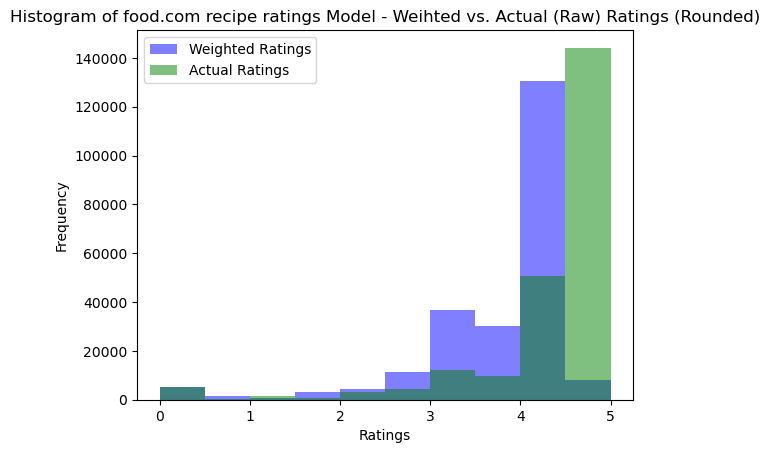

In [17]:
plot_histogram(
    recipe_ratings_df['weighted_rating'],
    recipe_ratings_df['average_rating'],
    "food.com recipe ratings"
)

Sorted by weight, we have:

In [18]:
# Sort the DataFrame by 'weighted_rating' in descending order
ratings_weighted_sort_df = recipe_ratings_df.sort_values(by='weighted_rating', ascending=False)

# Display the sorted DataFrame
print(ratings_weighted_sort_df)

        recipe_id  total_ratings  average_rating  weighted_rating
224586     486261            217        4.990783         4.955609
36416       63621             74        4.959459         4.867010
31283       55309             52        5.000000         4.865591
23999       42976            118        4.915254         4.864274
23430       42038             57        4.964912         4.846382
...           ...            ...             ...              ...
132342     241027              1        0.000000         0.075758
13823       26261              1        0.000000         0.075758
224774     487102              1        0.000000         0.075758
198979     398969              1        0.000000         0.075758
111128     197717              1        0.000000         0.075758

[231637 rows x 4 columns]


This next part deals with the **recipes** database

In [19]:
# Load the data from the CSV file and set the column names
recipes_df = pd.read_csv('data/RAW_recipes.csv', header=0)

In [20]:
recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


Let's merge them:

In [21]:
# Merge the weighted_rating column into recipes_df based on id and recipe_id
merged_df = pd.merge(recipes_df, ratings_weighted_sort_df[['recipe_id', 'weighted_rating']], left_on='id', right_on='recipe_id', how='left')

# Drop the duplicate 'recipe_id' column (if needed)
merged_df.drop('recipe_id', axis=1, inplace=True)

In [22]:
merged_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,weighted_rating
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4.358974
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,3.154762
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,3.409091
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,3.888889
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,4.242424


Now to make the **recipes** SQL table

In [23]:
# Create a SQLite database and establish a connection
conn = sqlite3.connect('food_dotcom.db')
cur = conn.cursor()

cur.execute('DROP TABLE IF EXISTS recipes')

# Define the structure of the recipes table, including the 'weighted_rating' column
cur.execute('''
    CREATE TABLE recipes (
        id INTEGER PRIMARY KEY,
        name TEXT,
        description TEXT,
        steps TEXT,
        ingredients TEXT,
        weighted_rating TEXT
    )
''')

# Iterate through the DataFrame and insert records into the recipes table
for index, row in merged_df.iterrows():
    cur.execute('INSERT INTO recipes (id, name, description, steps, ingredients, weighted_rating) VALUES (?, ?, ?, ?, ?, ?)',
                (row['id'], row['name'], row['description'], row['steps'], row['ingredients'], row['weighted_rating']))
    
# Commit the changes and close the database connection
conn.commit()
conn.close()

In [24]:
%sql sqlite:///food_dotcom.db

In [25]:
%%sql
SELECT * FROM recipes LIMIT 5;

 * sqlite:///food_dotcom.db
Done.


id,name,description,steps,ingredients,weighted_rating
38,low fat berry blue frozen dessert,"this is yummy and low-fat, it always turns out perfect.","['toss 2 cups berries with sugar', 'let stand for 45 minutes , stirring occasionally', 'transfer berry-sugar mixture to food processor', 'add yogurt and process until smooth', 'strain through fine sieve', 'pour into baking pan', 'freeze uncovered until edges are solid but centre is soft', 'transfer to processor and blend until smooth again', 'return to pan and freeze until edges are solid', 'transfer to processor and blend until smooth again', 'fold in remaining 2 cups of blueberries', 'pour into plastic mold and freeze overnight', 'let soften slightly to serve']","['blueberries', 'granulated sugar', 'vanilla yogurt', 'lemon juice']",3.7797619047619
39,biryani,"delhi, india","['soak saffron in warm milk for 5 minutes and puree in blender', 'add chiles , onions , ginger , garlic , cloves , peppercorns , cardamom seeds , cinnamon , coriander and cumin seeds , poppy seeds , nutmeg , mace , cilantro or mint leaves and lemon juice', 'blend into smooth paste', 'put paste into large bowl , add yogurt and mix well', 'marinate chicken in yogurt mixture with salt , covered for at least 2 - 6 hours in refrigerator', 'in skillet', 'heat oil over medium heat for 1 minute', 'add ghee and 15 seconds later add onion and fry for about8 minutes', 'reserve for garnish', 'in same skillet , cook chicken with its marinade with tomatoes for about 10 minutes over medium heat , uncovered', 'remove chicken pieces from the sauce and set aside', 'add rice to sauce , bring to boil , and cook , covered over low heat for 15 minutes', 'return chicken and add raisins , cashews and almonds', 'mix well', 'simmer , covered for 5 minutes', 'place chicken , eggs and rice in large serving dish in such a way that yellow of the eggs , the saffron-colored rice , the nuts and the chicken make a colorful display', 'add reserved onion as garnish']","['saffron', 'milk', 'hot green chili peppers', 'onions', 'garlic', 'clove', 'peppercorns', 'cardamom seed', 'coriander seed', 'cumin seed', 'poppy seed', 'mace', 'cilantro', 'fresh lemon juice', 'plain yogurt', 'boneless chicken', 'salt', 'vegetable oil', 'ghee', 'onion', 'tomatoes', 'basmati rice', 'raisins', 'cashews', 'almonds', 'eggs']",2.57575757575758
40,best lemonade,"this is from one of my first good house keeping cookbooks. you must use a *zester* in order to avoid getting any of that bitter rind, and when you zest the lemons, zest them onto some sugar from the recipe (the sugar will 'catch' all of the oils). i also advise you from personal experience to use only the best skinned lemons for the best flavor.","['into a 1 quart jar with tight fitting lid , put sugar and lemon peel , or zest', 'add 1 1 / 2 cups very hot water', 'with lid fitted firmly , shake jar until sugar is dissolved', 'add lemon juice', 'refrigerate until chilled', 'to serve: into each 12-ounce glass , over ice cubes , pour 1 / 4 cup of the lemon syrup', 'then add chilled club soda or , if you prefer , water', 'stir to mix well']","['sugar', 'lemons, rind of', 'fresh water', 'fresh lemon juice', 'ice cube', 'club soda']",4.00584795321637
41,carina s tofu vegetable kebabs,this dish is best prepared a day in advance to allow the ingredients to soak in the marinade overnight.,"['drain the tofu , carefully squeezing out excess water , and pat dry with paper towels', 'cut tofu into one-inch squares', 'set aside', 'cut eggplant lengthwise in half , then cut each half into approximately three strips', 'cut strips crosswise into one-inch cubes', 'slice zucchini into half-inch thick slices', 'cut red pepper in half , removing stem and seeds , and cut each half into one-inch squares', 'wipe mushrooms clean with a moist paper towel and remove stems', 'thread tofu and vegetables on to barbecue skewers in alternating color combinations: for example , first a piece of eggplant , then a slice of tofu , then zucchini

This is for the junction table lookup

In [26]:
# Create a DataFrame for the junction table
recipe_ingredients_df = pd.DataFrame(columns=['recipe_id', 'ingredient_id'])

***this will take a long time...***

In [28]:
row_list = []  # List to store rows for concatenation

for i, (recipe_index, recipe_row) in enumerate(recipes_df.iterrows(), start=1):
    recipe_id = recipe_row['id']
    ingredients = eval(recipe_row['ingredients'])  # Assuming ingredients are comma-separated
    
    for ingredient in ingredients:
        matching_ingredients = ingr_map_df.loc[ingr_map_df['raw_ingr'] == ingredient]
        if not matching_ingredients.empty:
            ingredient_id = matching_ingredients.iloc[0]['id']
            row_list.append({'recipe_id': recipe_id, 'ingredient_id': ingredient_id, 'ingredient_name': ingredient})
        else:
            print(f"[{i} recipe: {recipe_id}] No match found: {ingredient}")

# Use pd.concat to concatenate rows
recipe_ingredients_df = pd.DataFrame(row_list)

NameError: name 'reciiipe_row' is not defined

In [59]:
# Save the DataFrame as a pickle file
pickle_file_path = 'recipe_ingredients.pkl'
recipe_ingredients_df.to_pickle(pickle_file_path)
print(f"DataFrame saved as pickle file: {pickle_file_path}")

DataFrame saved as pickle file: recipe_ingredients.pkl


In [27]:
pickle_file_path = 'recipe_ingredients.pkl'
recipe_ingredients_df = pd.read_pickle(pickle_file_path)

In [30]:
recipe_ingredients_df.head(10)

,recipe_id,ingredient_id,ingredient_name
0,137739,7933,winter squash
1,137739,4694,mexican seasoning
2,137739,4795,mixed spice
3,137739,3723,honey
4,137739,840,butter
5,137739,5006,olive oil
6,137739,6270,salt
7,31490,5481,prepared pizza crust
8,31490,6324,sausage patty
9,31490,2499,eggs


In [28]:
# Save as a table in the SQL database
with sqlite3.connect('food_dotcom.db') as conn:
    recipe_ingredients_df.to_sql('recipe_ingredients', conn, if_exists='replace', index=False)

This is a method we are working on to query the SQL database

In [29]:
import sqlite3
import json
import ast

def get_recipes_by_ingredients(database_path, ingredient_names, search_logic="or"):
    # Connect to the SQLite database
    conn = sqlite3.connect(database_path)
    cur = conn.cursor()

    # Execute the SQL query to retrieve recipes for the specified ingredients (using 'AND' conditions)
    query = """
        SELECT r.id, r.name, r.ingredients
        FROM recipes AS r
        INNER JOIN recipe_ingredients AS ri ON r.id = ri.recipe_id
        INNER JOIN ingredients AS i ON ri.ingredient_id = i.id
        WHERE i.replaced IN ({})
        GROUP BY r.id, r.name, r.ingredients
        HAVING COUNT(DISTINCT i.replaced) = ?
        """.format(','.join(['?'] * len(ingredient_names)))

    cur.execute(query, ingredient_names + [len(ingredient_names)])

    results = cur.fetchall()

    conn.close()

    # Prepare the results in JSON format
    recipes_json = []
    for result in results:
        recipe_id, recipe_name, recipe_ingredients = result
        try:
            # Use ast.literal_eval to safely convert the string to a Python list
            recipe_ingredients = ast.literal_eval(recipe_ingredients)
        except (ValueError, SyntaxError):
            # Handle cases where the string cannot be safely evaluated as a list
            recipe_ingredients = []

        recipe_info = {
            "RecipeID": recipe_id,
            "RecipeName": recipe_name,
            "Ingredients": recipe_ingredients
            
        }
        recipes_json.append(recipe_info)

    return recipes_json

In [30]:
# Example usage:
ingredient_names = ['garlic', 'lentil']
database_path = 'food_dotcom.db'

recipes = get_recipes_by_ingredients(database_path, ingredient_names)

In [31]:
print(json.dumps(recipes, indent=2))

[
  {
    "RecipeID": 6654,
    "RecipeName": "hearty meatless chili",
    "Ingredients": [
      "onion soup mix",
      "water",
      "chickpeas",
      "red kidney beans",
      "tomatoes",
      "lentils",
      "celery",
      "chili powder",
      "cumin",
      "garlic",
      "red pepper"
    ]
  },
  {
    "RecipeID": 8098,
    "RecipeName": "beef and lentil stew",
    "Ingredients": [
      "lean ground beef",
      "onion",
      "garlic",
      "mushroom stems and pieces",
      "stewed tomatoes",
      "celery",
      "carrot",
      "lentils",
      "water",
      "red wine",
      "bay leaf",
      "salt",
      "beef bouillon",
      "pepper",
      "parsley"
    ]
  },
  {
    "RecipeID": 8903,
    "RecipeName": "pasta with lentils and goat cheese",
    "Ingredients": [
      "vegetable broth",
      "lentils",
      "thyme",
      "orecchiette",
      "white wine vinegar",
      "parsley",
      "olive oil",
      "honey",
      "garlic",
      "goat cheese",
      "

In [32]:
%%sql
PRAGMA table_info(recipe_ingredients);

 * sqlite:///food_dotcom.db
Done.


cid,name,type,notnull,dflt_value,pk
0,recipe_id,INTEGER,0,None,0
1,ingredient_id,INTEGER,0,None,0
2,ingredient_name,TEXT,0,None,0


In [33]:
%%sql
PRAGMA table_info(recipes);

 * sqlite:///food_dotcom.db
Done.


cid,name,type,notnull,dflt_value,pk
0,id,INTEGER,0,None,1
1,name,TEXT,0,None,0
2,description,TEXT,0,None,0
3,steps,TEXT,0,None,0
4,ingredients,TEXT,0,None,0
5,weighted_rating,TEXT,0,None,0


In [34]:
%%sql
PRAGMA table_info(ingredients);

 * sqlite:///food_dotcom.db
Done.


cid,name,type,notnull,dflt_value,pk
0,raw_ingr,TEXT,0,None,0
1,raw_words,INTEGER,0,None,0
2,processed,TEXT,0,None,0
3,len_proc,INTEGER,0,None,0
4,replaced,TEXT,0,None,0
5,count,INTEGER,0,None,0
6,id,INTEGER,0,None,0


In [35]:
%%sql
SELECT id, name, ingredients, weighted_rating
        FROM recipes 
        WHERE ingredients LIKE '%basil%' AND ingredients LIKE '%garlic%' 
        GROUP BY id, name, ingredients, weighted_rating
        ORDER BY weighted_rating DESC
        LIMIT 3

 * sqlite:///food_dotcom.db
Done.


id,name,ingredients,weighted_rating
55309,caprese salad tomatoes italian marinated tomatoes,"['roma tomatoes', 'garlic clove', 'extra virgin olive oil', 'salt', 'dried basil', 'lemon, juice of']",4.86559139784946
248495,make your own boursin cheese paula deen,"['cream cheese', 'whipped butter', 'garlic salt', 'dried oregano', 'dried basil', 'dried dill', 'dried marjoram', 'black pepper', 'dried thyme']",4.83627832684436
186029,the best creole cajun seasoning mix,"['onion powder', 'garlic powder', 'dried oregano', 'dried basil', 'dried thyme', 'fresh ground black pepper', 'white pepper', 'cayenne pepper', 'paprika', 'seasoning salt']",4.83188788335847
